# Câu hỏi: 
- Các phim thuộc cùng thể loại có xu hướng nhận được điểm đánh giá (Score) hoặc độ phổ biến (Popularity) tương tự hay không?
- Lợi ích: 
    - giúp xác định xem liệu anime được nhiều người đánh giá có xu hướng được đánh giá cao hơn không. Từ đó, các nhà sản xuất có thể đánh giá độ tin cậy của điểm trung bình dựa trên số lượng người đánh giá.
    - Hiểu được ảnh hưởng của thể loại đến đánh giá và sự yêu thích của người xem.
    - Xác định các thể loại có tính đồng nhất cao về điểm số hoặc độ phổ biến.
- Cách tìm câu trả lời:
    - Tăng hiệu quả của hệ thống gợi ý bằng cách nhóm các thể loại có đặc điểm tương đồng.
    - Gợi ý anime phù hợp hơn dựa trên sở thích thể loại của người dùng.

# Đọc dữ liệu

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('anime_genres_encoded.csv')

In [147]:
df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,...,0,0,0,0,1,0,0,0,0,0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,...,0,0,0,0,1,0,0,0,0,0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,...,0,0,1,0,0,0,0,1,0,0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,...,0,0,0,0,0,0,0,0,0,0


In [148]:
print("Missing values:")
print(df[['Score', 'Scored By', 'Popularity']].isnull().sum())

Missing values:
Score         8047
Scored By     8047
Popularity       0
dtype: int64


In [149]:
df = df.dropna(subset=['Score', 'Scored By'])

print("Missing values after cleaning:")
print(df[['Score', 'Scored By', 'Popularity']].isnull().sum())

Missing values after cleaning:
Score         0
Scored By     0
Popularity    0
dtype: int64


In [150]:
# Trích xuất năm từ cột 'Aired' (giả sử định dạng là "YYYY-MM-DD" hoặc "YYYY")
df['Year'] = pd.to_datetime(df['Aired'], errors='coerce').dt.year
# Bỏ các dòng có giá trị null trong cột Year hoặc Score
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype('int')

# Lọc dữ liệu trong 20 năm trở lại đây
current_year = pd.Timestamp.now().year
df = df[(df['Year'] >= (current_year - 21)) & (df['Year'] < current_year)]

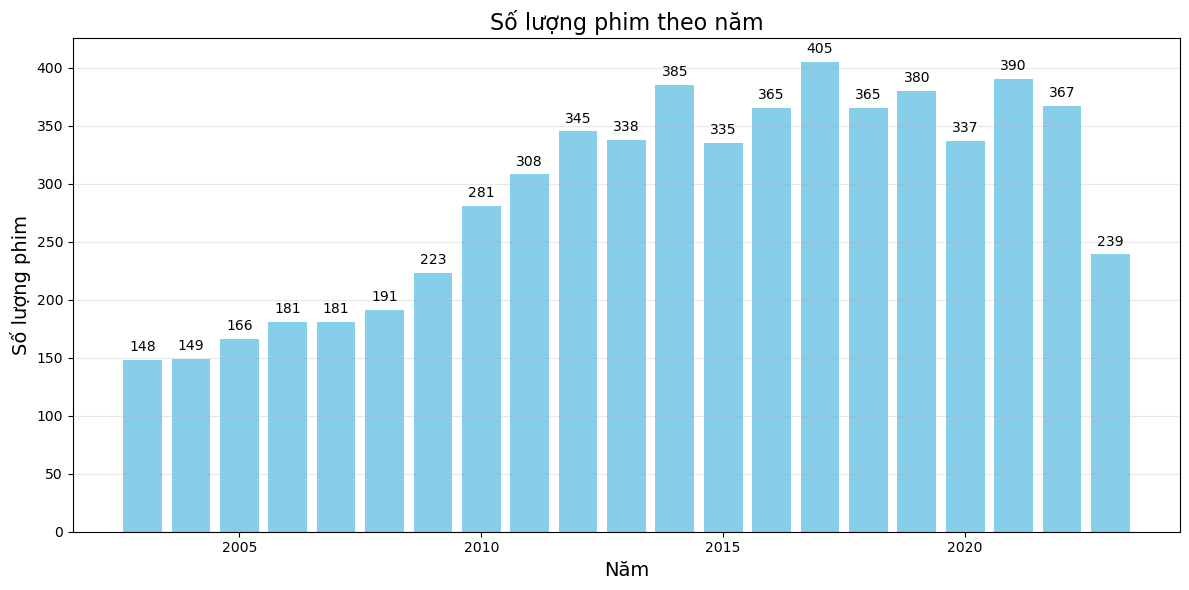

In [151]:
movies_per_year = df['Year'].value_counts().sort_index()

# Vẽ biểu đồ số lượng phim qua các năm
plt.figure(figsize=(12, 6))
bars = plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue', width=0.8)

# Hiển thị số lượng phim trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,  # Đặt giá trị nhãn phía trên cột
        f'{int(height)}',  # Hiển thị số lượng phim (dạng số nguyên)
        ha='center', va='bottom', fontsize=10
    )

# Cấu hình biểu đồ
plt.title('Số lượng phim theo năm', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



Tăng trưởng liên tục đến năm 2015:

Số lượng phim anime tăng đều đặn từ năm 2005 đến năm 2015, với đỉnh điểm là 405 phim vào năm 2015.
Điều này có thể phản ánh sự bùng nổ của ngành công nghiệp anime, nhờ vào sự phổ biến của các nền tảng phát hành trực tuyến và sự quan tâm ngày càng lớn từ khán giả quốc tế.
Ổn định từ 2015 đến 2019:

Từ năm 2015 đến 2019, số lượng phim duy trì mức cao ổn định, dao động quanh mức 365–405 phim mỗi năm.
Giai đoạn này cho thấy ngành công nghiệp anime đã đạt đến điểm bão hòa về số lượng phim phát hành.
Giảm nhẹ từ 2020 đến 2023:

Số lượng phim giảm dần sau năm 2020, với 239 phim vào năm 2023.
Điều này có thể bị ảnh hưởng bởi:
Đại dịch COVID-19: Khiến nhiều dự án bị trì hoãn hoặc hủy bỏ.
Tập trung vào chất lượng: Một số studio có thể giảm số lượng phim để tăng chất lượng sản xuất.

2005-2010:

Giai đoạn này chứng kiến sự tăng trưởng ổn định, từ 148 phim năm 2005 lên 308 phim vào năm 2010.
Đây là thời kỳ anime bắt đầu thu hút khán giả quốc tế nhờ internet và sự phát triển của các dịch vụ phát trực tuyến.
2010-2015:

Giai đoạn tăng trưởng mạnh mẽ, số lượng phim tăng từ 308 phim năm 2010 lên 405 phim vào năm 2015.
Sự phổ biến của anime trên toàn cầu và sự xuất hiện của các studio mới đã góp phần vào sự tăng trưởng này.
2020 trở đi:

Sự giảm nhẹ trong số lượng phim có thể phản ánh sự thay đổi trong chiến lược sản xuất, hoặc ảnh hưởng từ các yếu tố bên ngoài như đại dịch và chi phí sản xuất.

Biểu đồ cho thấy sự phát triển mạnh mẽ của ngành công nghiệp anime trong 10 năm từ 2005 đến 2015, tiếp đó là giai đoạn ổn định và giảm nhẹ sau 2020.
Số lượng phim giảm nhẹ gần đây có thể do các yếu tố như đại dịch, tập trung vào chất lượng, hoặc sự thay đổi trong nhu cầu thị trường.

In [152]:
genre_columns = [col for col in df.columns if col in [
    'Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 
    'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 
    'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 
    'Supernatural', 'Suspense', 'UNKNOWN'
]]
print(f'Tổng số thể loại đơn là: {len(genre_columns)}')

Tổng số thể loại đơn là: 22


1. Action (Hành động): tập trung vào các pha chiến đấu, hành động gay cấn.
2. Adventure (Phiêu lưu): xoay quanh các chuyến hành trình đến những vùng đất mới hoặc đối mặt với các thử thách thú vị.
3. Avant Garde (Phá cách): 
Thể loại này mang tính nghệ thuật cao, thường thể hiện qua phong cách kể chuyện độc đáo, sáng tạo hoặc phá cách.
Ví dụ: Serial Experiments Lain, Tatami Galaxy.
4. Award Winning (Đoạt giải thưởng)
Anime thuộc thể loại này đã giành được giải thưởng tại các sự kiện, liên hoan phim hoặc do các tổ chức uy tín trao tặng.
Ví dụ: Spirited Away, Your Name.
5. Boys Love (Tình cảm nam-nam)
Tập trung vào mối quan hệ tình cảm hoặc lãng mạn giữa các nhân vật nam.
Ví dụ: Given, Yuri!!! on Ice.
6. Comedy (Hài hước)
Các bộ anime hài hước thường chứa các tình tiết gây cười, nhẹ nhàng, và mang tính giải trí cao.
Ví dụ: Gintama, Konosuba.
7. Drama (Chính kịch)
Drama tập trung vào các câu chuyện mang tính hiện thực, với các xung đột cảm xúc mạnh mẽ hoặc tình tiết phức tạp.
Ví dụ: Clannad, Violet Evergarden.
8. Ecchi (Hài hước mang tính gợi cảm)
Các anime thuộc thể loại này thường có yếu tố hài hước kết hợp với cảnh gợi cảm nhưng không đi quá giới hạn.
Ví dụ: High School DxD, To Love-Ru.
9. Erotica (18+ rõ rệt)
Thể loại này chứa nội dung nhạy cảm, thường tập trung vào cảnh người lớn và chủ yếu dành cho khán giả trưởng thành.
10. Fantasy (Kỳ ảo)
Fantasy là các câu chuyện diễn ra trong thế giới tưởng tượng hoặc huyền bí, với các yếu tố phép thuật và siêu nhiên.
Ví dụ: Re
, Sword Art Online.
11. Girls Love (Tình cảm nữ-nữ)
Tập trung vào mối quan hệ tình cảm hoặc lãng mạn giữa các nhân vật nữ.
Ví dụ: Bloom Into You, Citrus.
12. Gourmet (Ẩm thực)
Anime thuộc thể loại này tập trung vào ẩm thực, nghệ thuật nấu ăn và các câu chuyện xoay quanh thức ăn.
Ví dụ: Shokugeki no Soma, Yakitate!! Japan.
13. Hentai (18+ hoàn toàn)
Anime thuộc thể loại này mang nội dung người lớn rõ rệt và không phù hợp với khán giả dưới 18 tuổi.
14. Horror (Kinh dị)
Các bộ anime kinh dị thường có yếu tố rùng rợn, siêu nhiên hoặc gây cảm giác sợ hãi, hồi hộp.
Ví dụ: Another, Higurashi no Naku Koro ni.
15. Mystery (Bí ẩn)
Tập trung vào các vụ án, bí ẩn hoặc các câu chuyện cần được giải đáp.
Ví dụ: Death Note, Erased.
16. Romance (Lãng mạn)
Romance xoay quanh các mối quan hệ tình yêu, từ nhẹ nhàng đến kịch tính.
Ví dụ: Toradora, Kimi ni Todoke.
17. Sci-Fi (Khoa học viễn tưởng)
Sci-Fi tập trung vào công nghệ tương lai, không gian, hoặc các khái niệm khoa học giả tưởng.
Ví dụ: Steins;Gate, Cowboy Bebop.
18. Slice of Life (Lát cắt cuộc sống)
Thể loại này phản ánh những khía cạnh đời sống hàng ngày, thường mang tính nhẹ nhàng, gần gũi.
Ví dụ: Barakamon, March Comes in Like a Lion.
19. Sports (Thể thao)
Anime thể thao xoay quanh các câu chuyện về các bộ môn thể thao hoặc các cuộc thi đấu.
Ví dụ: Haikyuu!!, Kuroko no Basket.
20. Supernatural (Siêu nhiên)
Supernatural thường tập trung vào các yếu tố vượt ngoài khả năng con người như linh hồn, phép thuật, hoặc quái vật.
Ví dụ: Bleach, Noragami.
21. Suspense (Hồi hộp)
Suspense mang lại cảm giác căng thẳng, hồi hộp với các câu chuyện chứa nhiều bất ngờ.
Ví dụ: Monster, Psycho-Pass.
22. UNKNOWN (Không xác định)
UNKNOWN dùng để chỉ các bộ anime không rõ thể loại hoặc dữ liệu bị thiếu.


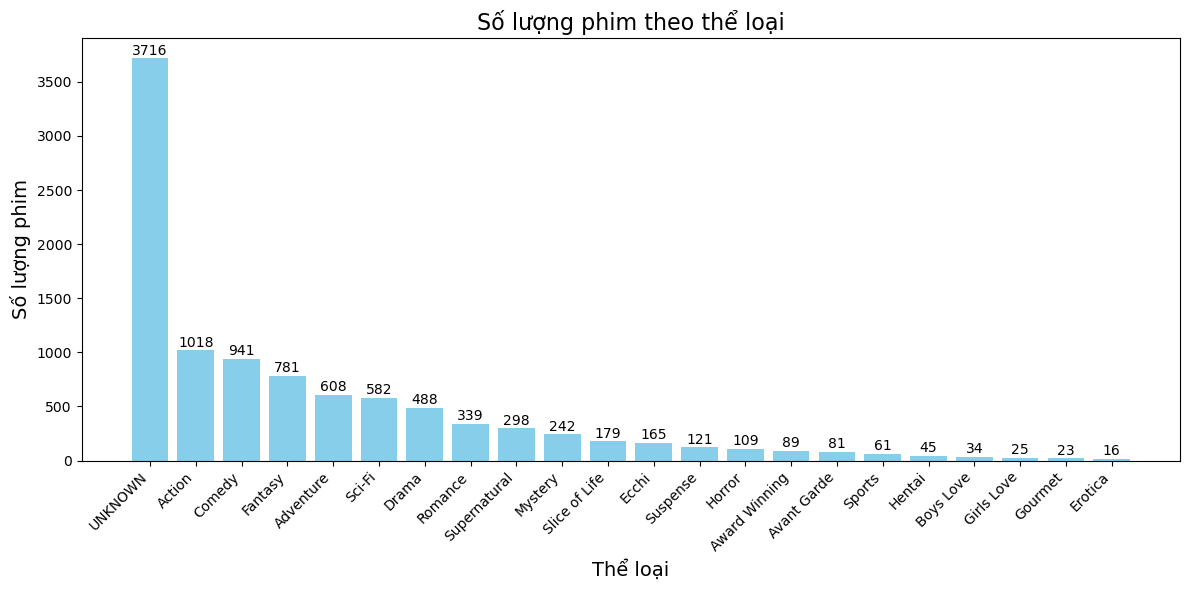

In [153]:
# Tính số lượng phim theo từng thể loại
movies_per_genre = {genre: df[genre].sum() for genre in genre_columns}

# Chuyển đổi sang DataFrame để dễ xử lý và sắp xếp
movies_per_genre_df = pd.DataFrame(movies_per_genre.items(), columns=['Genre', 'Number of Movies'])

# Sắp xếp số lượng phim giảm dần
movies_per_genre_df = movies_per_genre_df.sort_values(by='Number of Movies', ascending=False)

# Vẽ biểu đồ số lượng phim theo từng thể loại
plt.figure(figsize=(12, 6))
bars = plt.bar(movies_per_genre_df['Genre'], movies_per_genre_df['Number of Movies'], color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,  # Đặt giá trị nhãn phía trên cột
        f'{int(height)}',  # Hiển thị số lượng phim (dạng số nguyên)
        ha='center', va='bottom', fontsize=10
    )
    
plt.title('Số lượng phim theo thể loại', fontsize=16)
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Thể loại phổ biến nhất
UNKNOWN (3716 phim):

UNKNOWN chiếm số lượng lớn nhất, vượt xa các thể loại khác.
Đây có thể là kết quả của dữ liệu không đầy đủ hoặc không được gán đúng thể loại. UNKNOWN không đại diện cho một thể loại cụ thể nên cần cân nhắc loại bỏ khỏi phân tích sâu hơn để có kết quả chính xác.
Action (1018 phim):

Thể loại hành động đứng đầu trong số các thể loại được gán nhãn rõ ràng, cho thấy sự phổ biến rộng rãi của các bộ anime thiên về hành động, chiến đấu.
Comedy (941 phim):

Phim hài đứng ở vị trí thứ hai, thể hiện rằng thể loại giải trí nhẹ nhàng này thu hút một lượng lớn khán giả.
Fantasy (781 phim):

Các câu chuyện kỳ ảo với yếu tố sáng tạo cao tiếp tục là một chủ đề hấp dẫn đối với người xem.
2. Thể loại ít phổ biến
Erotica (16 phim):

Đây là thể loại ít phổ biến nhất, có thể do đây là chủ đề nhạy cảm hoặc dành cho đối tượng khán giả hạn chế.
Gourmet (23 phim):

Thể loại ẩm thực cũng rất ít được khai thác, mặc dù đã có một số thành công như "Shokugeki no Soma" (Food Wars).
Girls Love (34 phim) và Boys Love (45 phim):

Các thể loại này dành cho nhóm khán giả nhất định và có sự phát triển trong những năm gần đây, nhưng vẫn chưa đạt đến mức độ phổ biến như các thể loại chính thống.
3. Các thể loại nổi bật khác
Sci-Fi (582 phim):

Các bộ anime khoa học viễn tưởng chiếm vị trí đáng kể, đặc biệt nhờ các tác phẩm nổi bật như "Ghost in the Shell" hoặc "Steins;Gate".
Romance và Drama:

Romance (339 phim) và Drama (488 phim) thể hiện sự quan tâm của người xem với các câu chuyện tập trung vào cảm xúc, mối quan hệ và các xung đột cá nhân.
4. Gợi ý phân tích sâu hơn
Loại bỏ UNKNOWN:

UNKNOWN chiếm tỷ lệ quá lớn và không cung cấp thông tin cụ thể. Hãy cân nhắc loại bỏ UNKNOWN khi phân tích chi tiết để tránh làm lệch kết quả.
Phân tích xu hướng theo năm:

Xem xét sự thay đổi số lượng phim trong từng thể loại qua các năm để phát hiện xu hướng, ví dụ: thể loại nào đang tăng trưởng hoặc giảm sút.
Mối quan hệ giữa thể loại và điểm số (Score):

Xác định xem thể loại nào có xu hướng đạt điểm số cao nhất, ví dụ: thể loại "Award Winning" có ít phim nhưng thường nhận được đánh giá cao.
5. Kết luận
Hành động, hài, kỳ ảo và phiêu lưu là những thể loại được sản xuất nhiều nhất, phản ánh sự ưa chuộng của khán giả đối với các bộ anime giải trí, sáng tạo.
Thể loại ít phổ biến như Erotica, Gourmet, Boys Love, và Girls Love phục vụ cho các nhóm khán giả cụ thể và có quy mô nhỏ hơn.
UNKNOWN nên được xử lý hoặc loại bỏ khỏi phân tích chi tiết để tránh ảnh hưởng đến các kết luận.

In [154]:
df = df.drop(columns=['UNKNOWN']))
genre_columns.remove('UNKNOWN')
genre_columns

Index(['ID', 'Title', 'Episodes', 'Type', 'Aired', 'Producers', 'Studios',
       'Source', 'Genres', 'Duration', 'Score', 'Scored By', 'Rank',
       'Popularity', 'Action', 'Adventure', 'Avant Garde', 'Award Winning',
       'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy',
       'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance',
       'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense',
       'Year'],
      dtype='object')


['Action',
 'Adventure',
 'Avant Garde',
 'Award Winning',
 'Boys Love',
 'Comedy',
 'Drama',
 'Ecchi',
 'Erotica',
 'Fantasy',
 'Girls Love',
 'Gourmet',
 'Hentai',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life',
 'Sports',
 'Supernatural',
 'Suspense']

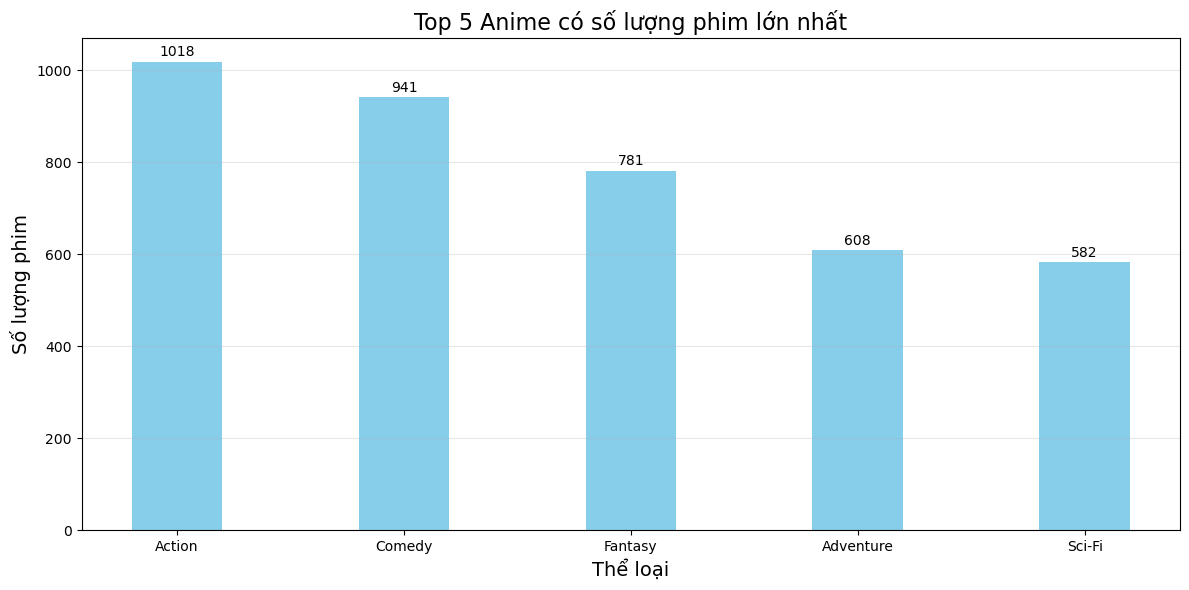

In [142]:
# Tính số lượng phim cho từng thể loại
genre_counts = {}
for genre in genre_columns:  # genre_columns là danh sách thể loại đã định nghĩa trước đó
    count = df[genre].sum()  # Tổng số phim thuộc thể loại đó
    genre_counts[genre] = count

# Chuyển đổi sang DataFrame để dễ dàng xử lý
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Sắp xếp theo số lượng giảm dần và lấy 5 thể loại đầu tiên
top_5_genres = genre_counts_df.sort_values(by='Count', ascending=False).head(5)

# Vẽ biểu đồ cột với độ rộng được điều chỉnh
plt.figure(figsize=(12, 6))
bars = plt.bar(top_5_genres['Genre'], top_5_genres['Count'], color='skyblue', width=0.4)

# Hiển thị số lượng phim trên từng cột
for bar in bars:
    height = bar.get_height()  # Lấy chiều cao của từng cột
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Vị trí x
        height + 5,  # Vị trí y (cao hơn cột một chút)
        f'{int(height)}',  # Giá trị được hiển thị (dạng số nguyên)
        ha='center', va='bottom', fontsize=10  # Căn giữa
    )

# Cấu hình biểu đồ
plt.title('Top 5 Anime có số lượng phim lớn nhất', fontsize=16)
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.xticks(ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


Action (1,018 phim):

Thể loại hành động chiếm vị trí đầu bảng, với số lượng phim vượt xa các thể loại khác. Điều này phản ánh sự ưa chuộng của khán giả đối với các bộ anime có yếu tố chiến đấu, căng thẳng, và năng động.
Comedy (941 phim):

Thể loại hài đứng thứ hai, cho thấy mức độ phổ biến của các bộ anime mang tính giải trí nhẹ nhàng, dễ tiếp cận.
Fantasy (781 phim):

Các câu chuyện kỳ ảo luôn thu hút khán giả nhờ sự sáng tạo và yếu tố phép thuật, thần thoại.
Adventure (608 phim):

Thể loại phiêu lưu phản ánh sự hấp dẫn của các câu chuyện về hành trình khám phá và chinh phục thử thách.
Sci-Fi (582 phim):

Anime khoa học viễn tưởng mang lại sức hút từ các ý tưởng sáng tạo về công nghệ và tương lai.
2. Phân tích tổng quát
Thể loại phổ biến nhất thường mang tính giải trí và sáng tạo cao:

Các thể loại như Action, Comedy, Fantasy, và Adventure là những lựa chọn hàng đầu của khán giả, nhờ vào sự cuốn hút trong nội dung và dễ tiếp cận với nhiều đối tượng.
Sci-Fi dù ít hơn nhưng vẫn giữ vị trí đáng kể, nhờ những tác phẩm kinh điển như Ghost in the Shell, Steins;Gate, hay Cowboy Bebop.
Tập trung sản xuất lớn ở các thể loại chính:

Hầu hết các studio sản xuất số lượng lớn anime thuộc những thể loại này, đáp ứng nhu cầu lớn từ thị trường.

Kết luận
Các thể loại phổ biến như Action, Comedy, và Fantasy phản ánh đúng thị hiếu khán giả về nội dung dễ tiếp cận, giải trí, và sáng tạo.
Các phân tích tiếp theo có thể tập trung vào chất lượng (điểm số), xu hướng thời gian, hoặc so sánh giữa các nhóm thể loại khác nhau.



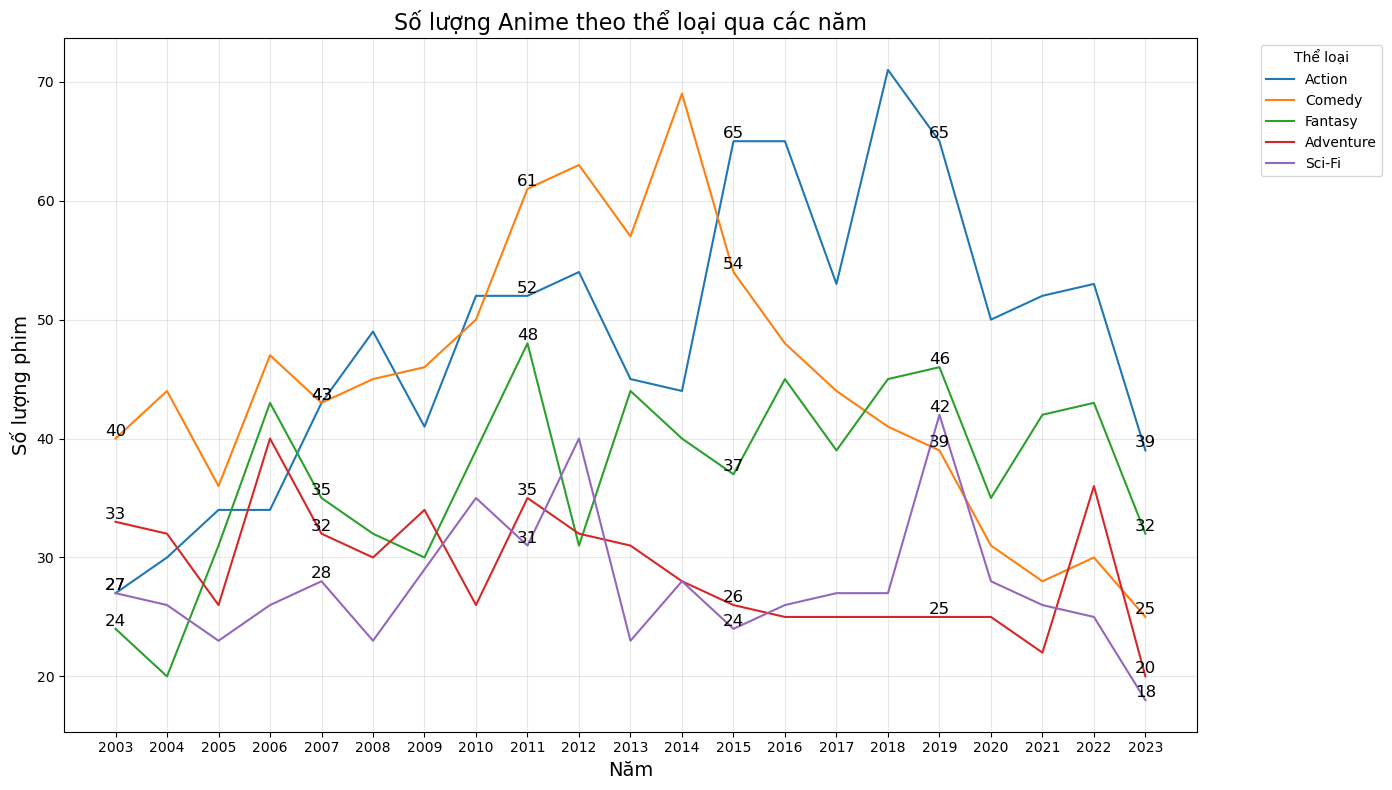

In [156]:
# Nhóm dữ liệu theo năm và tính số lượng phim cho từng thể loại
trend_data = df.groupby('Year')[genre_columns].sum()

# Vẽ biểu đồ xu hướng cho một số thể loại tiêu biểu (nếu quá nhiều thể loại, chọn lọc)
selected_genres = top_5_genres['Genre']
plt.figure(figsize=(14, 8))

for genre in selected_genres:
    plt.plot(trend_data.index, trend_data[genre], label=genre)
    
    for x, y in zip(trend_data.index[::4], trend_data[genre][::4]):
        plt.text(x, y, f'{int(y)}', fontsize=12, ha='center', va='bottom')

# Cấu hình biểu đồ
plt.title('Số lượng Anime theo thể loại qua các năm', fontsize=16)
plt.xticks(ticks=trend_data.index[::1], labels=trend_data.index[::1])
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng phim', fontsize=14)
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

1. Xu hướng tổng quát theo thời gian
Giai đoạn 2003-2014:

Các thể loại đều có xu hướng tăng trưởng đều đặn trong giai đoạn này.
Đây là thời kỳ bùng nổ của ngành công nghiệp anime, với số lượng phim gia tăng nhanh chóng.
Giai đoạn 2015-2023:

Số lượng phim thuộc tất cả các thể loại bắt đầu có xu hướng giảm dần, đặc biệt là từ năm 2019.
Nguyên nhân có thể bao gồm:
Tác động của đại dịch COVID-19 (2020-2022), ảnh hưởng đến sản xuất và phát hành.
Thay đổi chiến lược sản xuất: Các studio có thể giảm số lượng để tập trung vào chất lượng.
2. Phân tích theo từng thể loại
Action:
Xu hướng:

Là thể loại dẫn đầu về số lượng, đạt đỉnh cao vào năm 2014 (65 phim).
Số lượng phim giảm dần sau năm 2014, với mức giảm mạnh từ năm 2020-2023 (chỉ còn 39 phim vào năm 2023).
Giải thích:

Action là thể loại phổ biến nhất nhưng sự suy giảm sau năm 2014 có thể phản ánh sự thay đổi trong thị hiếu khán giả hoặc chiến lược của các studio.
Comedy:
Xu hướng:

Comedy duy trì mức cao ổn định trong giai đoạn 2010-2015 (khoảng 60-65 phim mỗi năm).
Từ năm 2016 trở đi, số lượng giảm dần, đạt mức thấp nhất vào năm 2023 (32 phim).
Giải thích:

Thể loại hài vẫn là một lựa chọn phổ biến, nhưng sự suy giảm gần đây có thể do khán giả chuyển hướng sang các thể loại sâu sắc hơn.
Fantasy:
Xu hướng:

Fantasy đạt đỉnh vào năm 2014 (54 phim), sau đó số lượng giảm dần và chững lại ở mức trung bình 37-42 phim mỗi năm từ năm 2016-2022.
Giải thích:

Các câu chuyện kỳ ảo vẫn có sức hút lớn, nhưng thị trường thể loại này có thể đã bão hòa, dẫn đến sự giảm nhẹ về số lượng.
Adventure:
Xu hướng:

Adventure có xu hướng dao động mạnh, đạt đỉnh vào năm 2013 (35 phim) nhưng giảm dần sau đó.
Số lượng giảm sâu vào giai đoạn 2020-2023, chỉ còn 25 phim vào năm 2023.
Giải thích:

Thể loại phiêu lưu có thể ít được sản xuất hơn do các studio chuyển hướng sang những thể loại có câu chuyện tập trung hơn.
Sci-Fi:
Xu hướng:

Là thể loại có số lượng phim ít nhất trong top 5, dao động quanh mức 20-30 phim mỗi năm.
Gần đây, Sci-Fi có xu hướng giảm nhẹ, với chỉ 18 phim vào năm 2023.
Giải thích:

Sci-Fi là thể loại khá đặc thù, yêu cầu cốt truyện sáng tạo và phức tạp, dẫn đến số lượng phim ít hơn so với các thể loại khác.
3. Gợi ý phân tích sâu hơn
Xu hướng giảm sau 2019:
Tìm hiểu chi tiết hơn lý do giảm số lượng phim ở tất cả các thể loại từ 2020 trở đi:
Có phải do đại dịch COVID-19, hay sự thay đổi trong thị hiếu khán giả?
So sánh điểm trung bình (Score):
Kiểm tra liệu các thể loại này có giữ được chất lượng (điểm trung bình cao) dù số lượng giảm hay không.
Kết hợp thể loại:
Phân tích mối quan hệ giữa các thể loại: Ví dụ, liệu một số thể loại có xu hướng xuất hiện cùng nhau trong các bộ anime?
4. Kết luận
Action và Comedy là hai thể loại chiếm ưu thế trong suốt giai đoạn 2003-2023.
Sự suy giảm từ năm 2020-2023 có thể là tác động chung từ các yếu tố bên ngoài, chẳng hạn như đại dịch hoặc thay đổi chiến lược sản xuất.
Fantasy và Adventure giữ mức ổn định nhưng không có sự tăng trưởng rõ rệt trong những năm gần đây.

In [118]:
top_5_genre_columns = top_5_genres['Genre'].tolist()

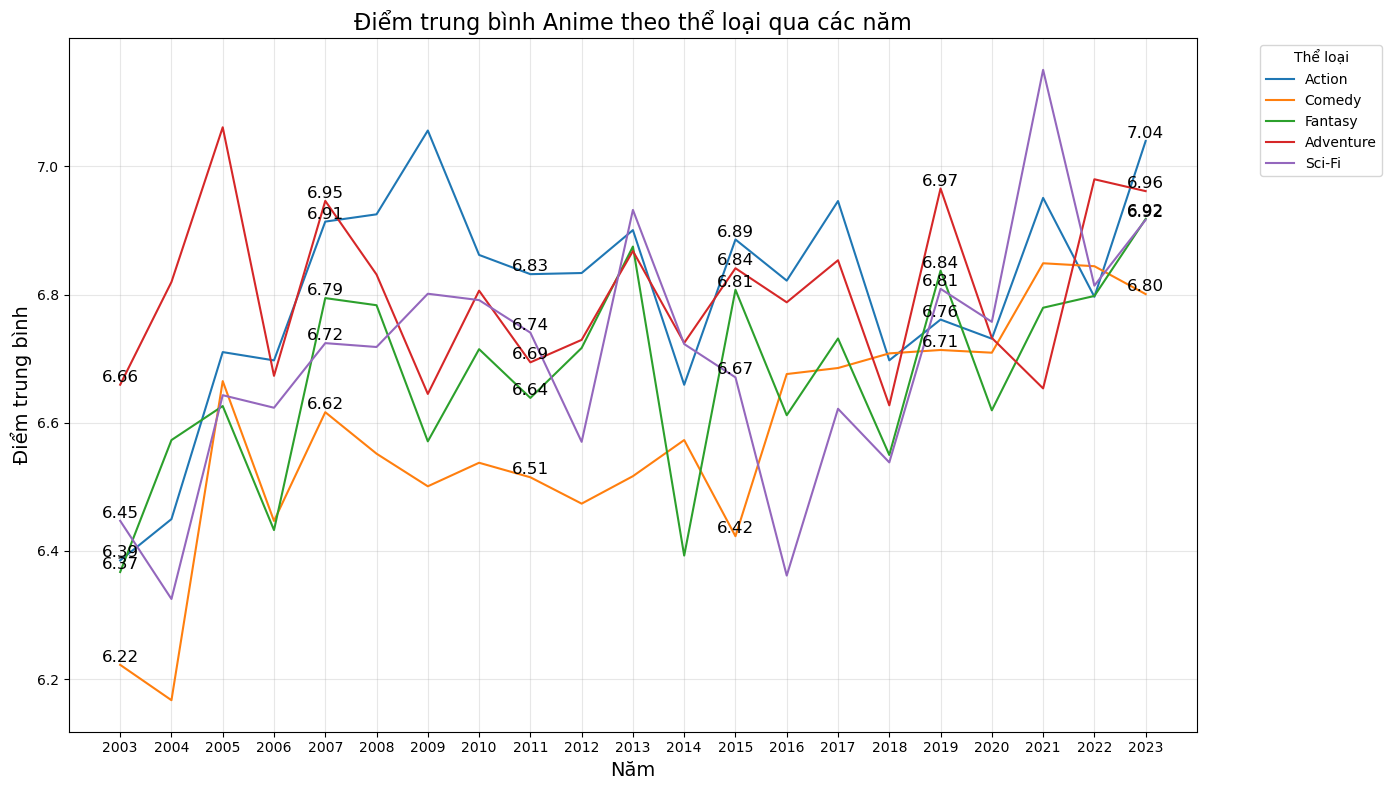

In [119]:
# Tính điểm trung bình theo năm cho từng thể loại trong top_10_genre_columns
genre_yearly_avg = {}

for genre in top_5_genre_columns:  # Sử dụng danh sách 10 thể loại hàng đầu
    genre_data = df[df[genre] == 1]  # Lọc các phim thuộc thể loại đó
    yearly_avg = genre_data.groupby('Year')['Score'].mean()  # Tính trung bình theo năm
    genre_yearly_avg[genre] = yearly_avg

# Chuyển đổi kết quả thành DataFrame
genre_yearly_avg_df = pd.DataFrame(genre_yearly_avg)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 8))
for genre in top_5_genre_columns:
    plt.plot(genre_yearly_avg_df.index, genre_yearly_avg_df[genre], label=genre)
    
    for x, y in zip(genre_yearly_avg_df.index[::4], genre_yearly_avg_df[genre][::4]):
        plt.text(x, y, f'{y:.2f}', fontsize=12, ha='center', va='bottom')

# Cấu hình biểu đồ
plt.title('Điểm trung bình Anime theo thể loại qua các năm', fontsize=16)
plt.xticks(ticks=genre_yearly_avg_df.index[::1], labels=genre_yearly_avg_df.index[::1])
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Điểm trung bình', fontsize=14)
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Xu hướng tổng quát
Điểm trung bình dao động trong khoảng từ 6.2 đến 7.0:

Hầu hết các thể loại duy trì điểm trung bình ổn định, không có sự biến động quá lớn.
Một số năm, các thể loại có điểm giảm mạnh nhưng thường phục hồi ngay sau đó.
Tăng dần từ năm 2020 trở đi:

Sau năm 2020, điểm trung bình của hầu hết các thể loại có xu hướng tăng, cho thấy sự cải thiện về chất lượng hoặc sự khắt khe hơn trong đánh giá của khán giả.
2. Phân tích theo từng thể loại
Action:
Xu hướng:
Điểm trung bình của thể loại Action tương đối ổn định trong khoảng 6.6-6.9 qua các năm.
Đạt đỉnh vào năm 2023 với 7.04, cho thấy sự cải thiện đáng kể về chất lượng.
Giải thích:
Các bộ anime hành động gần đây có thể đã tập trung hơn vào cốt truyện và chất lượng sản xuất, giúp nâng cao điểm trung bình.
Comedy:
Xu hướng:

Comedy giữ mức điểm trung bình ổn định, dao động từ 6.3-6.8.
Điểm trung bình thấp hơn so với các thể loại khác, có thể do tính chất hài hước đôi khi mang tính giải trí hơn là chiều sâu nội dung.
Giải thích:

Các bộ anime hài thường không được đánh giá cao về cốt truyện phức tạp, nhưng vẫn giữ được sức hút nhờ yếu tố giải trí.
Fantasy:
Xu hướng:

Fantasy có điểm trung bình cao hơn các thể loại khác, đạt đỉnh 6.96 vào năm 2023.
Tăng trưởng ổn định, đặc biệt trong giai đoạn 2020-2023.
Giải thích:

Các bộ anime kỳ ảo hiện nay kết hợp nhiều yếu tố sáng tạo và đầu tư hơn về hình ảnh, giúp giữ được điểm cao.
Adventure:
Xu hướng:

Adventure dao động mạnh nhất trong các thể loại, với điểm thấp nhất là 6.42 (2015) và điểm cao nhất là 6.97 (2023).
Giải thích:

Sự biến động có thể do các bộ anime phiêu lưu phụ thuộc nhiều vào ý tưởng mới và chất lượng sản xuất, nên dễ có các năm điểm thấp.
Sci-Fi:
Xu hướng:

Sci-Fi duy trì điểm trung bình ổn định ở mức 6.6-6.9.
Điểm cao nhất là 6.92 (2022), cho thấy sự cải thiện gần đây trong các bộ anime khoa học viễn tưởng.
Giải thích:

Sci-Fi là thể loại có tính đặc thù, yêu cầu sáng tạo cao, do đó dù số lượng không lớn nhưng chất lượng thường ổn định.
3. Gợi ý phân tích sâu hơn
Tìm hiểu lý do tăng điểm sau 2020:

Điểm trung bình của hầu hết các thể loại tăng từ 2020 trở đi. Điều này có thể do sự thay đổi trong cách sản xuất hoặc khán giả khắt khe hơn trong đánh giá.
So sánh với số lượng phim:

Liệu sự tăng/giảm số lượng phim có ảnh hưởng đến điểm trung bình không? Ví dụ, Action có điểm trung bình tăng nhưng số lượng giảm.
Tập trung vào năm 2023:

Hầu hết các thể loại đều đạt điểm cao nhất vào năm 2023. Phân tích các bộ anime nổi bật trong năm này để tìm hiểu yếu tố đóng góp.
4. Kết luận
Fantasy và Action là hai thể loại có điểm trung bình cao nhất trong các năm gần đây.
Comedy và Adventure có sự biến động lớn, cho thấy chúng phụ thuộc nhiều vào chất lượng từng bộ anime.
Sci-Fi giữ điểm trung bình ổn định, phù hợp với tính đặc thù của thể loại này.

In [127]:
# Lọc dữ liệu năm 2023
year_2023 = df[df['Year'] == 2023]

# Tìm anime có điểm cao nhất trong năm 2023
top_anime_2023 = year_2023.sort_values(by='Score', ascending=False).head(10)
display(top_anime_2023[['Title', 'Score', 'Studios', 'Genres']])

,Title,Score,Studios,Genres
23653,Idol,8.74,Doga Kobo,UNKNOWN
12762,Pluto,8.47,Studio M2,"Action, Mystery, Sci-Fi, Suspense"
21105,Blue Giant,8.38,Nut,UNKNOWN
22802,Meitantei Conan Movie 26: Kurogane no Submarine,8.36,TMS Entertainment,"Action, Mystery"
14836,Girls & Panzer: Saishuushou Part 4,8.35,Actas,UNKNOWN
21663,Sasaki to Miyano Movie: Sotsugyou-hen,8.31,Studio Deen,UNKNOWN
23595,Seishun Buta Yarou wa Randoseru Girl no Yume w...,8.31,CloverWorks,"Drama, Romance, Supernatural"
22603,Fate/strange Fake: Whispers of Dawn,8.20,A-1 Pictures,"Action, Fantasy"
23012,Spy x Family Movie: Code: White,8.15,"Wit Studio, CloverWorks","Action, Comedy"
23483,Precure All Stars Movie F,8.11,Toei Animation,UNKNOWN


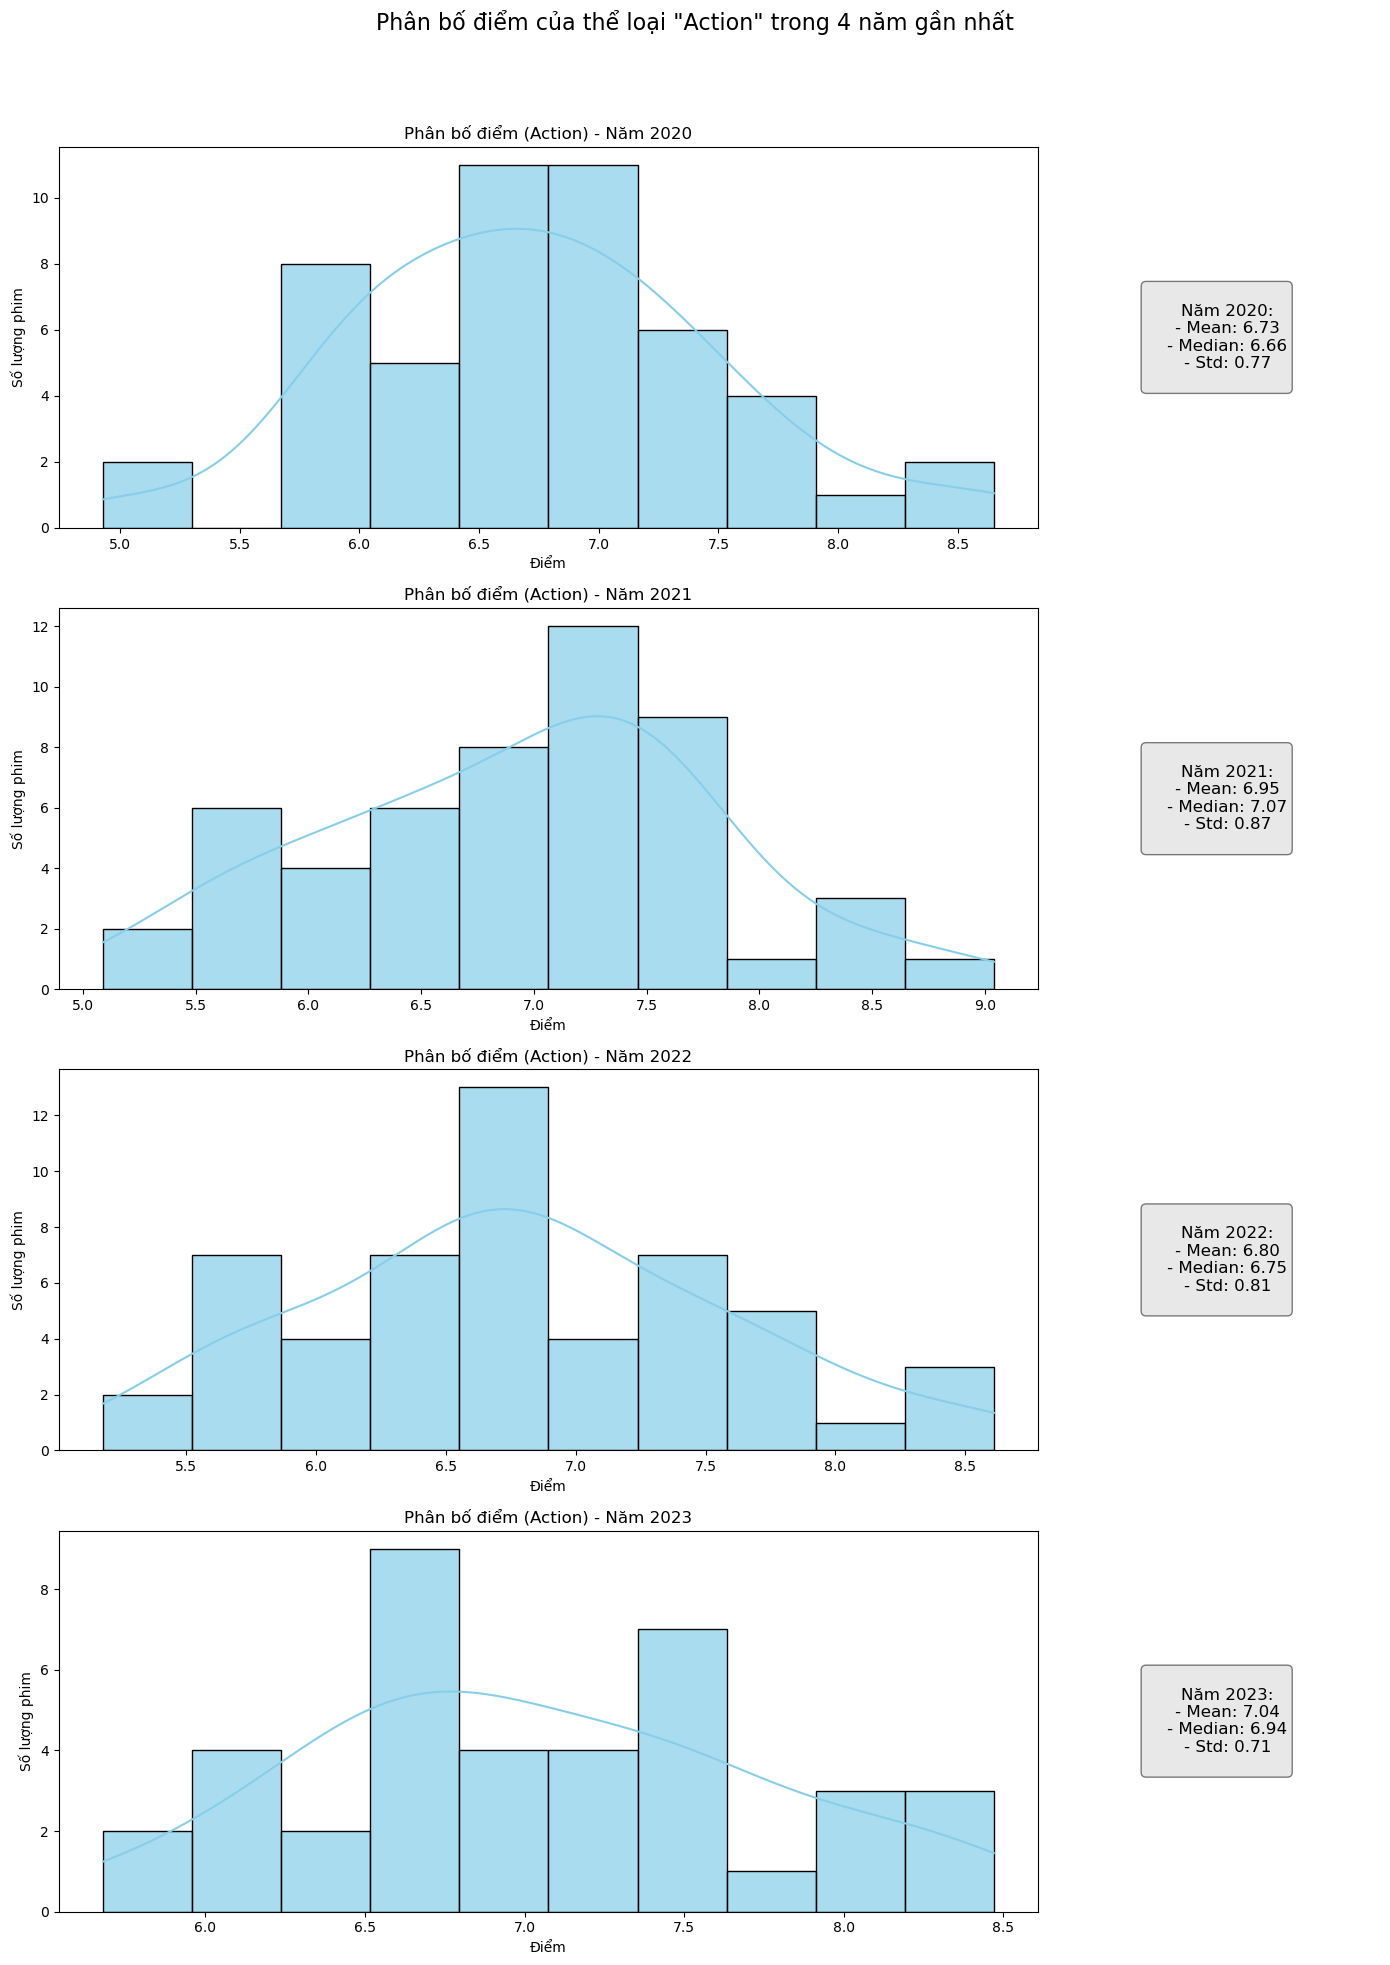

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Chọn thể loại cần phân tích
selected_genre = 'Action'

# Lọc dữ liệu theo thể loại và các năm cần phân tích
filtered_data = df[(df[selected_genre] == 1) & (df['Year'].isin([2020, 2021, 2022, 2023]))]

# Danh sách các năm cần phân tích
years = [2020, 2021, 2022, 2023]

# Tạo figure với layout 4 hàng và 2 cột
fig = plt.figure(figsize=(14, 20))
gs = GridSpec(4, 2, width_ratios=[3, 1])  # Cột đầu cho histogram, cột thứ hai cho box

# Duyệt qua từng năm và tạo các biểu đồ + box
for i, year in enumerate(years):
    # Lấy dữ liệu điểm của năm hiện tại
    year_data = filtered_data[filtered_data['Year'] == year]['Score'].dropna()
    
    # Tạo histogram (cột 1)
    ax_hist = fig.add_subplot(gs[i, 0])
    sns.histplot(year_data, bins=10, kde=True, ax=ax_hist, color='skyblue', alpha=0.7)
    ax_hist.set_title(f'Phân bố điểm ({selected_genre}) - Năm {year}', fontsize=12)
    ax_hist.set_ylabel('Số lượng phim', fontsize=10)
    ax_hist.set_xlabel('Điểm', fontsize=10)

    # Tính các chỉ số thống kê
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()

    # Tạo box chứa các chỉ số (cột 2)
    ax_box = fig.add_subplot(gs[i, 1])
    ax_box.axis('off')  # Tắt trục của box
    stats_text = f"""
    Năm {year}:
    - Mean: {mean:.2f}
    - Median: {median:.2f}
    - Std: {std:.2f}
    """
    ax_box.text(0.5, 0.5, stats_text, fontsize=12, ha='center', va='center', 
                bbox=dict(boxstyle="round", facecolor='lightgrey', alpha=0.5))

# Căn chỉnh bố cục
plt.suptitle(f'Phân bố điểm của thể loại "{selected_genre}" trong 4 năm gần nhất', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Chừa không gian cho tiêu đề
plt.show()


# Các chỉ số thống kê của từng thể loại

In [ ]:
import pandas as pd

# Tạo danh sách các cột thể loại
genre_columns = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
                 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love',
                 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
                 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']

# Tính thống kê cho từng thể loại
genre_stats = {}
for genre in genre_columns:
    genre_data = df[df[genre] == 1]  # Lọc các phim thuộc thể loại đó
    genre_stats[genre] = {
        'score_mean': genre_data['Score'].mean(),
        'score_std': genre_data['Score'].std(),
        'popularity_mean': genre_data['Scored By'].mean(),
        'popularity_std': genre_data['Scored By'].std(),
    }

# Chuyển kết quả thành DataFrame để dễ dàng trực quan hóa
genre_stats_df = pd.DataFrame(genre_stats).T
print(genre_stats_df)


# Trực quan hóa phân phối điểm và độ phổ biến

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame cho box plot
boxplot_data = df.melt(id_vars=['Score'], value_vars=genre_columns, 
                       var_name='Genre', value_name='Belongs')
boxplot_data = boxplot_data[boxplot_data['Belongs'] == 1]  # Chỉ lấy các dòng có giá trị 1

# Vẽ box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=boxplot_data, x='Genre', y='Score')
plt.xticks(rotation=90)
plt.title('Distribution of Scores by Genre')
plt.show()


Phân phối hẹp (ít đa dạng):

Các thể loại như Award Winning, Drama, và Romance có phân phối điểm số khá hẹp. Điều này cho thấy các phim thuộc các thể loại này thường có chất lượng đánh giá đồng đều.

Phân phối rộng (đa dạng):

Các thể loại như Avant Garde, Comedy, và Horror có phân phối rộng với nhiều giá trị ngoại lai (outliers). Điều này chỉ ra rằng các phim thuộc những thể loại này có chất lượng đánh giá đa dạng hơn, từ thấp đến cao.
Điểm số trung bình:

Thể loại có điểm trung bình cao:

Award Winning, Drama, và Romance dường như có điểm trung bình cao hơn các thể loại khác.
Thể loại có điểm trung bình thấp hơn:
Horror, Hentai, và Avant Garde có xu hướng nhận điểm trung bình thấp hơn so với các thể loại khác.

Ngoại lệ (Outliers):

Hầu hết các thể loại có các giá trị ngoại lai. Điều này có thể chỉ ra rằng một số phim đặc biệt nổi bật (hoặc không được đánh giá cao) trong thể loại đó.


Các câu hỏi tiềm năng từ biểu đồ
Liệu các thể loại có phân phối điểm số khác biệt một cách đáng kể không?

Bạn có thể thực hiện kiểm định thống kê (ANOVA hoặc Kruskal-Wallis) để kiểm tra sự khác biệt giữa các thể loại.
Điểm trung bình cao nhất của từng thể loại có ý nghĩa gì?

Phân tích sâu hơn về các phim có điểm cao nhất trong các thể loại để tìm hiểu đặc điểm của chúng.
Tại sao các thể loại như Comedy và Horror có phân phối rộng?

Có thể các phim trong các thể loại này được đánh giá bởi nhóm người dùng đa dạng về sở thích.

In [ ]:
# Biểu đồ Bar Chart cho độ phổ biến
genre_stats_df[['popularity_mean']].sort_values(by='popularity_mean').plot(kind='bar', figsize=(15, 6))
plt.title('Average Popularity by Genre')
plt.ylabel('Average Scored By')
plt.show()


Thể loại phổ biến nhất:

Suspense, Award Winning, và Romance là các thể loại có mức độ phổ biến cao nhất, với số lượng người đánh giá trung bình cao nhất. Điều này cho thấy các thể loại này thu hút nhiều sự chú ý từ cộng đồng người xem.
Thể loại kém phổ biến:

Hentai, Sports, và Slice of Life có mức độ phổ biến thấp nhất, thể hiện qua số lượng người đánh giá trung bình rất thấp. Điều này có thể do phạm vi người xem hạn chế hoặc ít phim thuộc các thể loại này được phát hành.
Các thể loại trung bình:

Các thể loại như Action, Drama, và Fantasy có mức độ phổ biến trung bình. Đây là các thể loại phổ biến rộng rãi nhưng không đạt đến mức độ phổ biến của Suspense hay Award Winning.
Mức độ đa dạng:

Sự khác biệt lớn về độ phổ biến giữa các thể loại, từ rất thấp (Hentai) đến rất cao (Suspense), chỉ ra rằng một số thể loại có phạm vi khán giả rộng rãi hơn nhiều.

Các câu hỏi tiềm năng từ biểu đồ

Tại sao Suspense và Award Winning lại phổ biến nhất?

Có thể các bộ phim thuộc các thể loại này có chất lượng cao hơn hoặc tiếp cận được lượng khán giả lớn hơn thông qua các nền tảng phát hành.

Liệu có mối tương quan giữa độ phổ biến và điểm số (Score)?

Bạn có thể kiểm tra mối quan hệ giữa số lượng người đánh giá (Scored By) và điểm số trung bình của từng thể loại.

Điều gì giải thích sự khác biệt lớn giữa các thể loại phổ biến và kém phổ biến?

Phân tích thêm về đặc điểm của các bộ phim trong các thể loại như Suspense hoặc Hentai để tìm ra nguyên nhân.

Hành động tiếp theo
Kiểm tra mối tương quan giữa Score và Scored By:

Xác định xem các thể loại phổ biến hơn có xu hướng nhận được điểm số cao hơn hay không.
python
Copy code
correlation = df_cleaned[['Score', 'Scored By']].corr(method='pearson')
print(correlation)
Phân tích sự khác biệt giữa các cụm thể loại phổ biến và kém phổ biến:

Nhóm các thể loại có độ phổ biến cao và thấp để so sánh các đặc điểm như phân phối điểm số hoặc tỉ lệ người xem quốc tế.
Phân tích xu hướng thời gian:

Kiểm tra xem độ phổ biến của các thể loại như Suspense hoặc Award Winning có tăng lên trong những năm gần đây hay không.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Tính Cosine Similarity
similarity_matrix = cosine_similarity(df[genre_columns].T)
similarity_df = pd.DataFrame(similarity_matrix, index=genre_columns, columns=genre_columns)

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Between Genres')
plt.show()


Thể loại có mức độ tương đồng cao:

Action và Adventure (0.46):
Đây là hai thể loại có Cosine Similarity cao, cho thấy chúng thường xuất hiện cùng nhau trong các bộ phim.
Drama và Romance (0.33):
Drama và Romance cũng có mức độ tương đồng khá cao, phù hợp với việc các bộ phim thuộc hai thể loại này thường xoay quanh cốt truyện cảm xúc.
Thể loại ít tương đồng:

Hentai và hầu hết các thể loại khác (gần 0):
Điều này chỉ ra rằng Hentai là một thể loại độc lập và ít có sự kết hợp với các thể loại khác.
Avant Garde và hầu hết các thể loại khác:
Avant Garde cũng có Cosine Similarity rất thấp với các thể loại khác, cho thấy nó thường không xuất hiện cùng các thể loại phổ biến.
Sự tương đồng giữa các nhóm thể loại:

Nhóm thể loại phổ biến:
Các thể loại như Action, Adventure, và Fantasy có tương đồng cao hơn với nhau, cho thấy rằng các bộ phim phiêu lưu thường kết hợp nhiều yếu tố hành động và tưởng tượng.
Nhóm thể loại tâm lý và cảm xúc:
Drama, Romance, và Slice of Life có sự tương đồng cao hơn với nhau, thể hiện các bộ phim có chủ đề liên quan đến cảm xúc con người thường kết hợp giữa các thể loại này.

Câu hỏi phân tích thêm
Liệu các thể loại có mức độ tương đồng cao (Action và Adventure) có xu hướng nhận được điểm số (Score) hoặc độ phổ biến (Scored By) tương tự hay không?

Thực hiện phân tích phân phối Score và Scored By của các bộ phim thuộc các thể loại này để kiểm tra.
Các thể loại có mức độ tương đồng thấp nhất có đặc điểm gì khác biệt?

Ví dụ: Phân tích các bộ phim thuộc thể loại như Hentai hoặc Avant Garde để xác định lý do vì sao chúng không liên quan đến các thể loại khác.
Thể loại trung tâm nhất là gì?

Tìm thể loại có nhiều mối liên kết với các thể loại khác nhất (giá trị Cosine Similarity cao với nhiều thể loại) và kiểm tra xem các bộ phim thuộc thể loại này có xu hướng bao quát nội dung của các nhóm thể loại khác không.

Hành động tiếp theo
Nhóm thể loại tương đồng:

Nhóm các thể loại có mức độ tương đồng cao (Cosine Similarity > 0.3) để phân tích sâu hơn về các đặc điểm như điểm số, độ phổ biến, hoặc thời gian phát hành.
Kiểm tra mối quan hệ giữa nhóm thể loại và đặc điểm phim:

Tính trung bình Score và Scored By của các phim thuộc nhóm thể loại tương đồng.
Trực quan hóa thêm:

Sử dụng Network Graph để hiển thị mối quan hệ giữa các thể loại dựa trên Cosine Similarity, giúp dễ dàng xác định các nhóm thể loại liên kết với nhau.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Thiết lập ngưỡng (threshold) để chỉ hiển thị các mối liên kết mạnh
threshold = 0.3  # Chỉ giữ các liên kết có Cosine Similarity lớn hơn 0.3
filtered_df = similarity_df.where(similarity_df > threshold, other=0)

# Tạo đồ thị NetworkX từ ma trận tương đồng
G = nx.Graph()

# Thêm các nút và cạnh vào đồ thị
for genre in filtered_df.columns:
    G.add_node(genre)
    for neighbor, weight in filtered_df[genre].items():
        if weight > 0 and genre != neighbor:  # Loại bỏ cạnh tự nối
            G.add_edge(genre, neighbor, weight=weight)

# Thiết lập bố trí và vẽ đồ thị
pos = nx.spring_layout(G, seed=42)  # Bố trí tự động
plt.figure(figsize=(12, 8))

# Lấy trọng số cạnh
edges = G.edges(data=True)
weights = [edge[2]['weight'] * 5 for edge in edges]  # Điều chỉnh độ dày của cạnh dựa trên trọng số

# Vẽ các nút, cạnh và nhãn
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1000*weights, alpha=1.0)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Hiển thị trọng số cạnh
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8)

# Tiêu đề và hiển thị
plt.title("Network Graph of Genre Relationships (Cosine Similarity)")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính hệ số tương quan Pearson cho từng thể loại
correlation_results = {}
for genre in genre_columns:
    genre_data = df[df[genre] == 1]
    correlation_results[genre] = genre_data[['Score', 'Scored By']].corr(method='pearson').iloc[0, 1]

# Chuyển thành DataFrame để xem kết quả
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])
print(correlation_df.sort_values(by='Correlation', ascending=False))

# Trực quan hóa scatter plot cho một thể loại cụ thể
selected_genre = 'Fantasy'  # Thay bằng thể loại bạn muốn xem
genre_data = df[df[selected_genre] == 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_data, x='Scored By', y='Score')
plt.title(f'Score vs Scored By for {selected_genre}')
plt.xlabel('Scored By (Popularity)')
plt.ylabel('Score')
plt.show()


In [ ]:
from scipy.stats import levene

# Tạo danh sách điểm số cho từng thể loại
score_groups = [df[df[genre] == 1]['Score'].dropna() for genre in genre_columns]

# Kiểm định Levene
levene_stat, levene_p = levene(*score_groups)
print(f"Levene Test Statistic: {levene_stat}, p-value: {levene_p}")


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Dữ liệu phân cụm
clustering_data = df[['Score', 'Scored By'] + genre_columns]

# Áp dụng K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Trực quan hóa cụm
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustering_data, x='Scored By', y='Score', hue='Cluster', palette='viridis')
plt.title('Clusters Based on Score and Popularity')
plt.xlabel('Scored By')
plt.ylabel('Score')
plt.show()


In [ ]:
# Trích xuất năm phát hành
df['Year'] = df['Aired'].str.extract(r'(\d{4})').astype(float)

# Nhóm theo năm và tính thống kê
yearly_stats = df.groupby('Year')[['Score', 'Scored By']].mean()

# Vẽ biểu đồ thay đổi theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='Score', label='Average Score')
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='Scored By', label='Average Scored By')
plt.title('Score and Popularity Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
# Tạo cột tổ hợp thể loại
df['Genre Combo'] = df[genre_columns].apply(lambda x: ', '.join(x.index[x == 1]), axis=1)

# Đếm tần suất các tổ hợp
genre_combos = df['Genre Combo'].value_counts()

# Hiển thị tổ hợp phổ biến nhất
print(genre_combos.head())


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu phân cụm
clustering_data = genre_stats_df[['score_mean', 'popularity_mean']]

# Áp dụng K-Means với số cụm K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Trực quan hóa cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='score_mean', y='popularity_mean', hue='Cluster', palette='viridis')
plt.title('Clustering of Genres Based on Score and Popularity')
plt.xlabel('Average Score')
plt.ylabel('Average Popularity')
plt.show()
